In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

TREATED_DATASET = '../dataset/fake_job_posting_lemmatization_treated.csv'

In [9]:
data = pd.read_csv(TREATED_DATASET)
data.head()

,Unnamed: 0,telecommuting,has_company_logo,has_questions,fraudulent,text_len
0,0,0,1,0,0,1967
1,1,0,1,0,0,4161
2,2,0,1,0,0,1929
3,3,0,1,0,0,4417
4,4,0,1,1,0,3294


In [10]:
colums_to_drop = ['fraudulent', 'Unnamed: 0']

X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [11]:
rf = RandomForestClassifier().fit(X_train, Y_train)

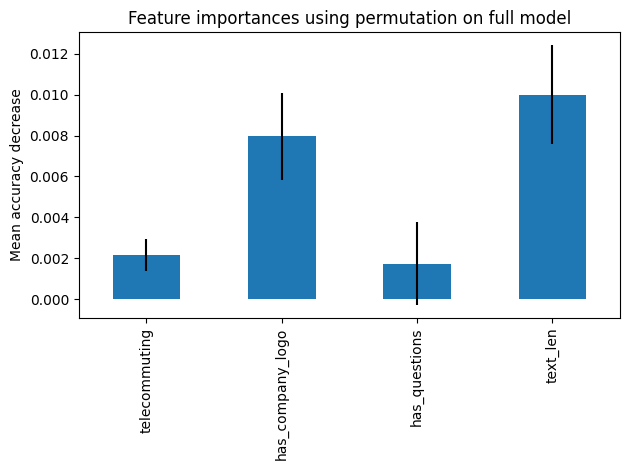

In [12]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Acurácia dos dados de teste:  0.9379545454545455



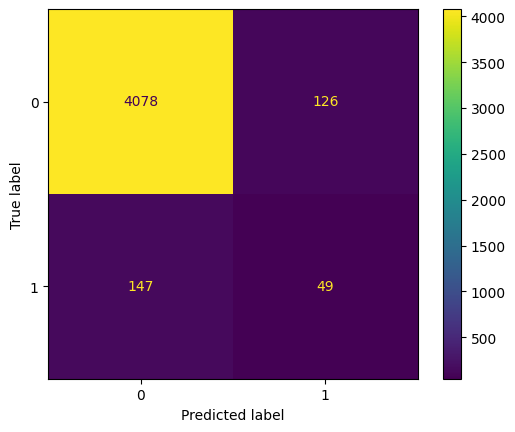

In [13]:
y_pred = rf.predict(X_test)

print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()

plt.show()

### Evaluation Metrics

Precision

In [14]:
precision_score_number = precision_score(Y_test, y_pred)
print(f"Precision Score of the classifier is: {precision_score_number}")

Precision Score of the classifier is: 0.28


Recall

In [15]:
recall_score_number = recall_score(Y_test, y_pred)
print(f"Recall Score of the classifier is: {recall_score_number}")

Recall Score of the classifier is: 0.25


F1-Score

In [16]:
f1_score_number = f1_score(Y_test, y_pred)
print(f"F1 Score of the classifier is: {f1_score_number}")

F1 Score of the classifier is: 0.2641509433962264


Precision-Recall Curve -> We are dealing with a imbalanced dataset, so the choice for using the Precision-Recall Curve is because it gives more importance to positive class. Thus is helpful for dealing with imbalanced data, which is our case for fake job postings. 

In [17]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
average_precision = average_precision_score(Y_test, y_pred)

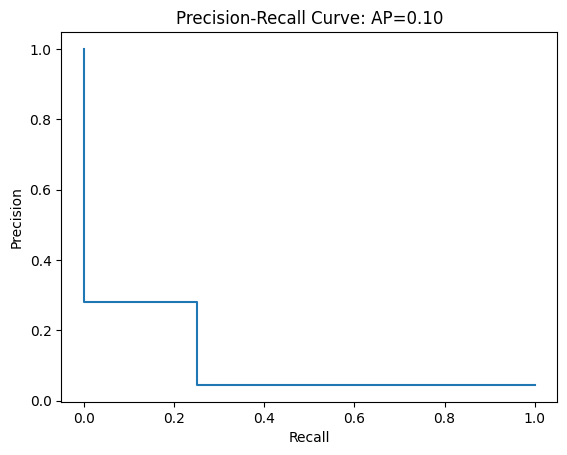

In [18]:
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()